In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage

Importing the dataset

In [4]:
df = pd.read_csv("Mall_Customers.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploritory Data Analysis

We check for dimensions, shape and coloumns 

In [5]:
print(df.shape)

(200, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


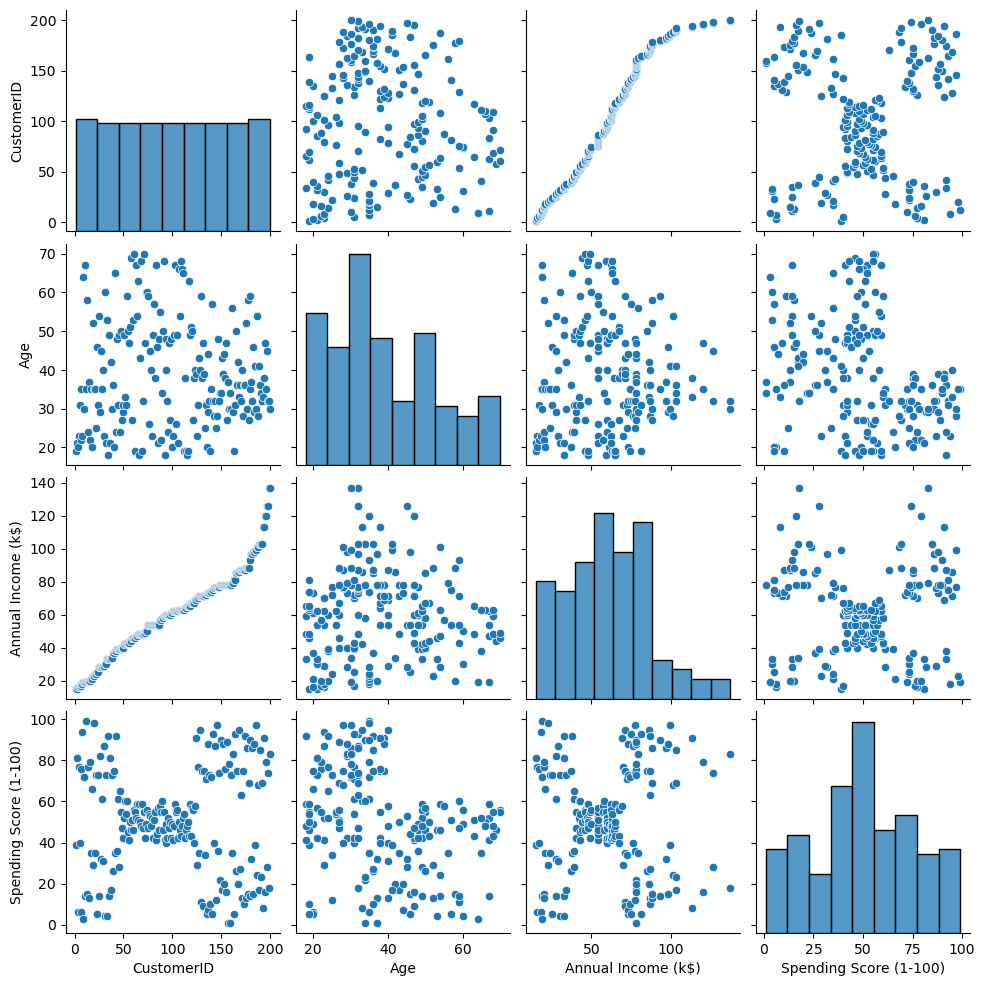

In [7]:
sns.pairplot(data=df)

# K-Means Clustering 

In [8]:
from sklearn.cluster import KMeans

In [19]:
X = df['Spending Score (1-100)']
Y = df['Annual Income (k$)']
print(X)
print(Y)
df1 = list(zip(X,Y))
print(df1)

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64
0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64
[(39, 15), (81, 15), (6, 16), (77, 16), (40, 17), (76, 17), (6, 18), (94, 18), (3, 19), (72, 19), (14, 19), (99, 19), (15, 20), (77, 20), (13, 20), (79, 20), (35, 21), (66, 21), (29, 23), (98, 23), (35, 24), (73, 24), (5, 25), (73, 25), (14, 28), (82, 28), (32, 28), (61, 28), (31, 29), (87, 29), (4, 30), (73, 30), (4, 33), (92, 33), (14, 33), (81, 33), (17, 34), (73, 34), (26, 37), (75, 37), (35, 38), (92, 38), (36, 39), (61, 39), (28, 39), (65, 39), (55, 40), (47, 40), (42, 40), (42, 40), (52, 42), (60, 42), (54, 43), (60, 43), (45, 43), (41, 43), (50, 44), (46, 44), (51, 46), (46, 46), (56, 46), (55, 46), (52, 47), (59, 47), (51, 48), (59, 48), (50, 4

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


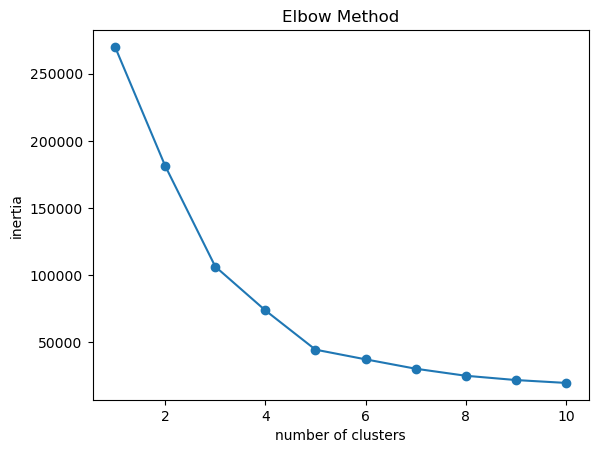

In [13]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()


In [33]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(df1)  


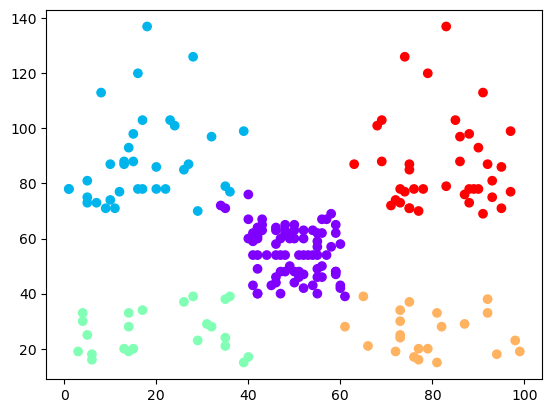

In [37]:
#visulaizing the clusters  
kmeans.fit(df1)
plt.scatter(X,Y, c=kmeans.labels_, cmap = 'rainbow')
plt.show()

# Dendrogram

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram by ward method

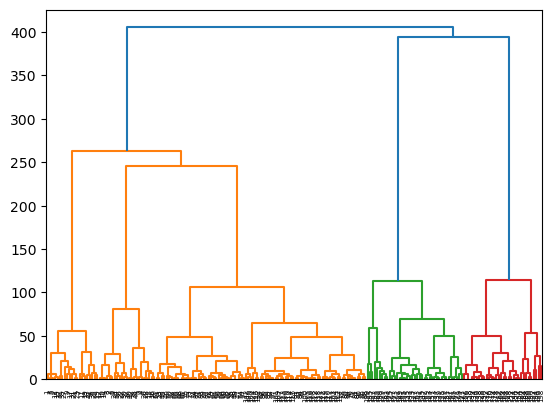

In [39]:
linkage_data = linkage(df1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.show()


dendrogram by single method

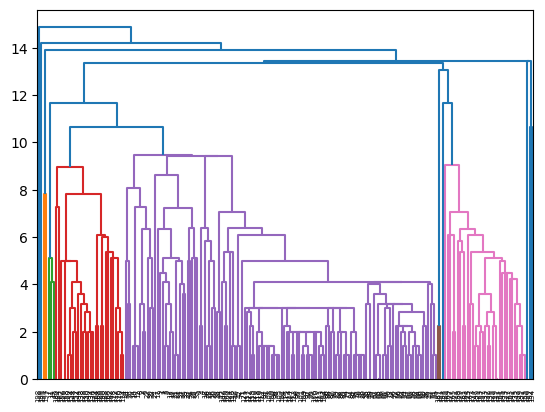

In [40]:
linkage_data = linkage(df1, method = 'single', metric = 'euclidean')
dendrogram(linkage_data)
plt.show()


dendrogram by average method

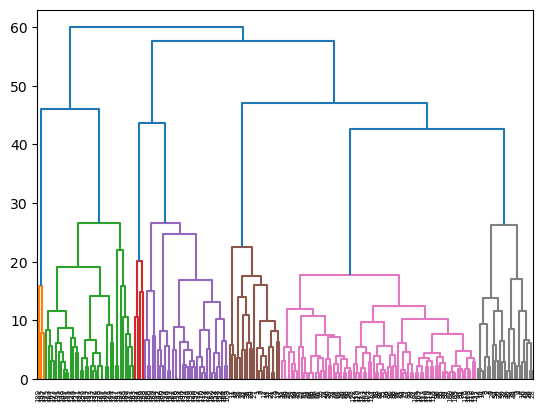

In [41]:
linkage_data = linkage(df1, method = 'average', metric = 'euclidean')
dendrogram(linkage_data)
plt.show()


# Hierarchical clustring

In [43]:
from sklearn.cluster import AgglomerativeClustering

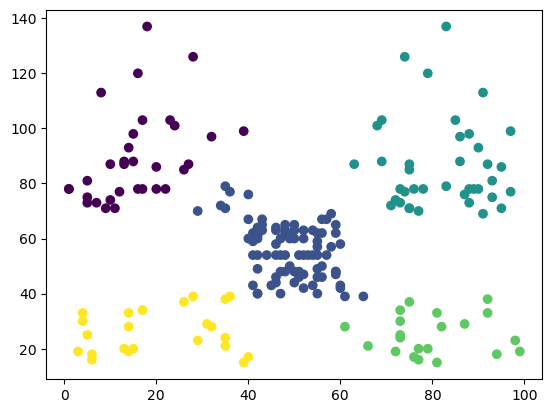

In [44]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit_predict(df1)

plt.scatter(X,Y, c = labels)
plt.show()
